# CAT Vehicle circular trajectory replication from Arizona Ring Road Experiment

In this notebook we conduct 21 car simulation by injecting velocity from FollowerStopper ring road experiment (Test 5)

## import required libraries

In [1]:
import sparkle
import os
from sparkle import lane
from sparkle import api
from sparkle import catvehicle
from sparkle import gzstats
homedir = os.path.expanduser("~")
import uuid
import glob
import bagpy
from bagpy import bagreader
import pandas as pd
import signal
import  time

In [2]:
velocity_folder = glob.glob("/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/*.csv")

In [3]:
velocity_folder =sorted(velocity_folder)
velocity_folder

['/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_01.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_02.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_03.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_04.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_05.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_06.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_07.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_08.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_09.csv',
 '/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_10.csv',


## declare simulation parameters

In [4]:
datadir = homedir +"/CyverseData/ProjectSparkle/RTFvsNVehicles"
n_vehicles = 21
include_laser = False
circumference = 260
max_update_rate = 100.0 # for gazebo
time_step = 0.01 # for gazebo
leader_vel = 8.0
log_time = 70.0
unique_runid = str(uuid.uuid4())
description = "Circular Trajectory, Unique run ID = " + unique_runid


# 2.82321111
wb = [2.82321111]

for w in wb:
    print("Wheelbase: {}".format(w))
    sim_config = {"n_vehicles":  n_vehicles, 
                  "include_laser": include_laser, 
                  "circumference": circumference,
                  "max_update_rate": max_update_rate, 
                  "time_step": time_step, 
                  "leader_vel": leader_vel,
                  "log_time": log_time, 
                  "description": description,
                  "package_name": "catvehicle",
                  "logdir": datadir, 
                  "wheelbase": w}

    C = catvehicle(**sim_config)
    C.create()
    C.spawn()
    time.sleep(2)

    C.control(leader_vel=leader_vel, logdir = datadir, control_method = "injector", \
             injection_files = velocity_folder, time_col = "Time", vel_col = "Speed")
    C.rviz(C.package_path + "/config/magna_multi.rviz")
    time.sleep(log_time)
    C.destroy(signal.SIGINT)

Wheelbase: 2.82321111
************ Radius of the circle is 41.3802852039 ************
Theta:0.299199300342 radian.
Constant Steering Angle:=0.0681204300119
Sparkle layout instance created.
Number of CPU on this machine: 8
PACKAGE NAME BEING EXECUTED IS catvehicle
... logging to /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/roslaunch-ivory-25992.log
started roslaunch server http://ivory.local:42143/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /gazebo/enable_ros_network: True
 * /rosdistro: melodic
 * /rosversion: 1.14.9
 * /use_sim_time: True

NODES
  /
    gazebo (gazebo_ros/gzserver)

ROS_MASTER_URI=http://localhost:11311
process[gazebo-1]: started with pid [26211]
Empty world launched.
Current  max_update_rate is 100.0
b8c7d3f0-0c44-11eb-ace3-144f8af0bf40
... logging to /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/roslaunch-ivory-25992.log
b8c7d3f0-0c44-11eb-ace3-144f8af0bf40
... logging to /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/ros

process[nebula/odom2pathnebula-18]: started with pid [26859]
process[nebula/global_frame_tf_nebula-19]: started with pid [26866]
[nebula/urdf_spawnernebula-11] process has finished cleanly
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/nebula-urdf_spawnernebula-11*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=12.1970531824', 'X:=39.5418752365', 'laser_sensor:=False', 'yaw:=1.86999562714', 'robot:=nebula']
started roslaunch server http://ivory.local:40873/

SUMMARY

PARAMETERS
 * /calista/distanceEstimator/angle_max: 10.0
 * /calista/distanceEstimator/angle_min: -10.0
 * /calista/distanceEstimator/scan_topic: /calista/front_la...
 * /calista/front_left_steering_position_controller/joint: front_left_steeri...
 * /calista/front_left_steering_position_controller/pid/d: 10.0
 * /calista/front_left_steering_position_controller/pid/i: 0.01
 * /calista/front_left_steering_position_controller

process[zel/joint_state_publisherzel-41]: started with pid [27600]
process[zel/base_link2slamodom_tf_zel-42]: started with pid [27608]
process[zel/cmdvel2gazebozel-43]: started with pid [27616]
process[zel/distanceEstimator-44]: started with pid [27623]
process[zel/odom2pathzel-45]: started with pid [27630]
process[zel/global_frame_tf_zel-46]: started with pid [27635]
[zel/urdf_spawnerzel-38] process has finished cleanly
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/zel-urdf_spawnerzel-38*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=38.5198212077', 'X:=15.117915785', 'laser_sensor:=False', 'yaw:=2.76759352816', 'robot:=zel']
started roslaunch server http://ivory.local:46203/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /rosdistro: melodic
 * /rosversion: 1.14.9
 * /use_sim_time: True
 * /zephyr/distanceEstimator/angle_max: 10.0
 * /zephyr/distanceEstimator/angle_min: -10.0
 

process[zenith/cmdvel2gazebozenith-70]: started with pid [28222]
process[zenith/distanceEstimator-71]: started with pid [28226]
process[zenith/odom2pathzenith-72]: started with pid [28235]
process[zenith/global_frame_tf_zenith-73]: started with pid [28237]
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=35.8363782024', 'X:=-20.690142602', 'laser_sensor:=False', 'yaw:=3.66519142919', 'robot:=zenith']
[zenith/urdf_spawnerzenith-65] process has finished cleanly
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/zenith-urdf_spawnerzenith-65*.log
started roslaunch server http://ivory.local:34593/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /europa/distanceEstimator/angle_max: 10.0
 * /europa/distanceEstimator/angle_min: -10.0
 * /europa/distanceEstimator/scan_topic: /europa/front_las...
 * /europa/front_left_steering_position_controller/joint: front_left_steeri...
 * /europa/front_left_steer

process[herse/urdf_spawnerherse-92]: started with pid [28792]
process[herse/controller_spawnerherse-93]: started with pid [28794]
process[herse/robot_state_publisherherse-94]: started with pid [28796]
process[herse/joint_state_publisherherse-95]: started with pid [28797]
process[herse/base_link2slamodom_tf_herse-96]: started with pid [28800]
process[herse/cmdvel2gazeboherse-97]: started with pid [28810]
process[herse/distanceEstimator-98]: started with pid [28813]
process[herse/odom2pathherse-99]: started with pid [28821]
process[herse/global_frame_tf_herse-100]: started with pid [28827]
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=6.1674114818', 'X:=-40.9181016076', 'laser_sensor:=False', 'yaw:=4.56278933021', 'robot:=herse']
[herse/urdf_spawnerherse-92] process has finished cleanly
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/herse-urdf_spawnerherse-92*.log
started roslaunch server h

process[himalia/urdf_spawnerhimalia-119]: started with pid [29398]
process[himalia/controller_spawnerhimalia-120]: started with pid [29400]
process[himalia/robot_state_publisherhimalia-121]: started with pid [29402]
process[himalia/joint_state_publisherhimalia-122]: started with pid [29404]
process[himalia/base_link2slamodom_tf_himalia-123]: started with pid [29410]
process[himalia/cmdvel2gazebohimalia-124]: started with pid [29413]
process[himalia/distanceEstimator-125]: started with pid [29421]
process[himalia/odom2pathhimalia-126]: started with pid [29424]
process[himalia/global_frame_tf_himalia-127]: started with pid [29430]
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=-28.1457418769', 'X:=-30.3338955256', 'laser_sensor:=False', 'yaw:=5.46038723124', 'robot:=himalia']
[himalia/urdf_spawnerhimalia-119] process has finished cleanly
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/himalia

process[arche/robot_state_publisherarche-148]: started with pid [30076]
process[arche/joint_state_publisherarche-149]: started with pid [30079]
process[arche/base_link2slamodom_tf_arche-150]: started with pid [30085]
process[arche/cmdvel2gazeboarche-151]: started with pid [30094]
process[arche/distanceEstimator-152]: started with pid [30098]
process[arche/odom2patharche-153]: started with pid [30100]
process[arche/global_frame_tf_arche-154]: started with pid [30108]
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=-41.2645775338', 'X:=3.09235258593', 'laser_sensor:=False', 'yaw:=6.35798513227', 'robot:=arche']
[arche/urdf_spawnerarche-146] process has finished cleanly
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/arche-urdf_spawnerarche-146*.log
started roslaunch server http://ivory.local:42067/

SUMMARY

PARAMETERS
 * /aitne/distanceEstimator/angle_max: 10.0
 * /aitne/distanceEstimator/ang

process[enceladus/joint_state_publisherenceladus-176]: started with pid [30678]
process[enceladus/base_link2slamodom_tf_enceladus-177]: started with pid [30696]
process[enceladus/cmdvel2gazeboenceladus-178]: started with pid [30700]
process[enceladus/distanceEstimator-179]: started with pid [30721]
process[enceladus/odom2pathenceladus-180]: started with pid [30723]
process[enceladus/global_frame_tf_enceladus-181]: started with pid [30737]
[enceladus/urdf_spawnerenceladus-173] process has finished cleanly
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/enceladus-urdf_spawnerenceladus-173*.log
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch started with run-time arguments ['Y:=-23.3103446637', 'X:=34.1899961277', 'laser_sensor:=False', 'yaw:=7.25558303329', 'robot:=enceladus']
started roslaunch server http://ivory.local:44045/

SUMMARY

PARAMETERS
 * /enable_statistics: True
 * /mimas/distanceEstimator/angle_max: 10.0
 * /mimas/d

process[nebula/velinjector_nebula-192]: started with pid [31967]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-time arguments ['str_angle:=0.0681204300119', 'time_col:=Time', 'vel_col:=Speed', 'robot:=nebula', 'csvfile:=/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_02.csv']
Velocity node 1  started.
started roslaunch server http://ivory.local:45731/

SUMMARY

PARAMETERS
 * /rosdistro: melodic
 * /rosversion: 1.14.9

NODES
  /calista/
    velinjector_calista (sparkle/velinjector.py)

ROS_MASTER_URI=http://localhost:11311
process[calista/velinjector_calista-193]: started with pid [32204]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-time arguments ['str_angle:=0.0681204300119', 'time_col:=Time', 'vel_col:=Speed', 'robot:=calista', 'csvfile:=/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_03.csv']
Velocity n

ROS_MASTER_URI=http://localhost:11311
process[kalyke/velinjector_kalyke-205]: started with pid [2006]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-time arguments ['str_angle:=0.0681204300119', 'time_col:=Time', 'vel_col:=Speed', 'robot:=kalyke', 'csvfile:=/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test5/test5_15.csv']
Velocity node 14  started.
started roslaunch server http://ivory.local:41621/

SUMMARY

PARAMETERS
 * /rosdistro: melodic
 * /rosversion: 1.14.9

NODES
  /carpo/
    velinjector_carpo (sparkle/velinjector.py)

ROS_MASTER_URI=http://localhost:11311
process[carpo/velinjector_carpo-206]: started with pid [2254]
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch started with run-time arguments ['str_angle:=0.0681204300119', 'time_col:=Time', 'vel_col:=Speed', 'robot:=carpo', 'csvfile:=/home/ivory/CyverseData/JmscslgroupData/ARED/2016-07-28/data_by_test/CSVData/test

[magna/velinjector_magna-191] escalating to SIGTERM
[magna/velinjector_magna-191] escalating to SIGKILL
Shutdown errors:
 * process[magna/velinjector_magna-191, pid 31867]: required SIGKILL. May still be running.


/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[nebula/cmdvel2gazebonebula-16] killing on exit
[nebula/odom2pathnebula-18] killing on exit
[nebula/robot_state_publishernebula-13] killing on exit
[nebula/base_link2slamodom_tf_nebula-15] killing on exit
[nebula/distanceEstimator-17] killing on exit
[nebula/global_frame_tf_nebula-19] killing on exit
[nebula/joint_state_publishernebula-14] killing on exit
[nebula/controller_spawnernebula-12] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch Terminated.
[nebula/velinjector_nebula-192] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[calista/global_frame_tf_calista-28] killing on exit
[calista/odom2pathcalista-27] killing on exit
[calista/distanceEstimator-26] killing on exit[calista/base_link2slamodom_tf_calista-24] killing on exit
[calista/robot_state_publishercalista-22] killing on exi

[herse/velinjector_herse-201] escalating to SIGTERM
[herse/velinjector_herse-201] escalating to SIGKILL
Shutdown errors:
 * process[herse/velinjector_herse-201, pid 1179]: required SIGKILL. May still be running.


/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[thebe/global_frame_tf_thebe-109] killing on exit[thebe/odom2paththebe-108] killing on exit

[thebe/distanceEstimator-107] killing on exit
[thebe/base_link2slamodom_tf_thebe-105] killing on exit
[thebe/joint_state_publisherthebe-104] killing on exit
[thebe/robot_state_publisherthebe-103] killing on exit
[thebe/cmdvel2gazebothebe-106] killing on exit
[thebe/controller_spawnerthebe-102] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/catvehicle/launch/catvehicle_spawn.launch Terminated.
[thebe/velinjector_thebe-202] killing on exit
/home/ivory/VersionControl/catvehicle_ws/src/sparkle/launch/velinjector.launch Terminated.
[metis/global_frame_tf_metis-118] killing on exit
[metis/distanceEstimator-116] killing on exit
[metis/base_link2slamodom_tf_metis-114] killing on exit
[metis/cmdvel2gazebometis-115] killing on exit
[metis/odom2pathmetis-117] killing on exit
[metis/robot_state_publishe

[gazebo-1] process has died [pid 26211, exit code -15, cmd /opt/ros/melodic/lib/gazebo_ros/gzserver -e ode /home/ivory/VersionControl/catvehicle_ws/src/catvehicle/worlds/plane.world __name:=gazebo __log:=/home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/gazebo-1.log].
log file: /home/ivory/.ros/log/b8c7d3f0-0c44-11eb-ace3-144f8af0bf40/gazebo-1*.log


Retrieving the latest bag file
Bag file is still being written. Bytes written: 122581
Bag file is still being written. Bytes written: 181415
Bag file is still being written. Bytes written: 174757
Bag file is still being written. Bytes written: 160115
Bag file is still being written. Bytes written: 220058
Bag file is still being written. Bytes written: 154605
Bag file is still being written. Bytes written: 149117
Bag file is still being written. Bytes written: 145751
Bag file is still being written. Bytes written: 143178
Bag file is still being written. Bytes written: 110657
Bag file is still being written. Bytes written: 58008
Bag file is still being written. Bytes written: 184801
Bag file is still being written. Bytes written: 131407
Bag file is still being written. Bytes written: 128830
Bag file is still being written. Bytes written: 126217
Bag file is still being written. Bytes written: 123316
Bag file is still being written. Bytes written: 121486
Bag file is still being written. By

In [5]:
bag = C.latesbag()
gz_stat_file = C.gzstatsfile
GZ = gzstats(gz_stat_file)
GZ.dataframe.to_csv(gz_stat_file[0:-4]+".csv")

Retrieving latest bag file
Bag File Recorded Is: catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_70.0_2020-10-11-21-42-32.bag
mkdir STDOUT:('', None)
Renaming GZStat log file [catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_70.0_2020-10-11-21-42-32/catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_70.0_2020-10-11-21-42-32_gzStats.txt] to retain bag file information
mv STDOUT:('', None)


In [8]:
b = bagreader(bag)
b.topic_table

[INFO]  Data folder /home/ivory/CyverseData/ProjectSparkle/RTFvsNVehicles/catvehicle_n_21_update_rate_20.0_max_update_rate_100.0_time_step_0.01_logtime_70.0_2020-10-11-21-42-32 already exists. Not creating.


,Topics,Types,Message Count,Frequency
0,/magna/vel,geometry_msgs/Twist,6405,None
1,/zel/steering,geometry_msgs/Wrench,6404,None
2,/calista/steering,geometry_msgs/Wrench,6407,None
3,/europa/path,nav_msgs/Path,66,None
4,/nebula/steering,geometry_msgs/Wrench,6388,None
5,/aitne/joint_states,sensor_msgs/JointState,673,None
6,/zel/path,nav_msgs/Path,49,None
7,/himalia/joint_states,sensor_msgs/JointState,690,None
8,/statistics,rosgraph_msgs/TopicStatistics,931,None
9,/himalia/odom,nav_msgs/Odometry,576,None


/home/ivory/.local/lib/python2.7/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


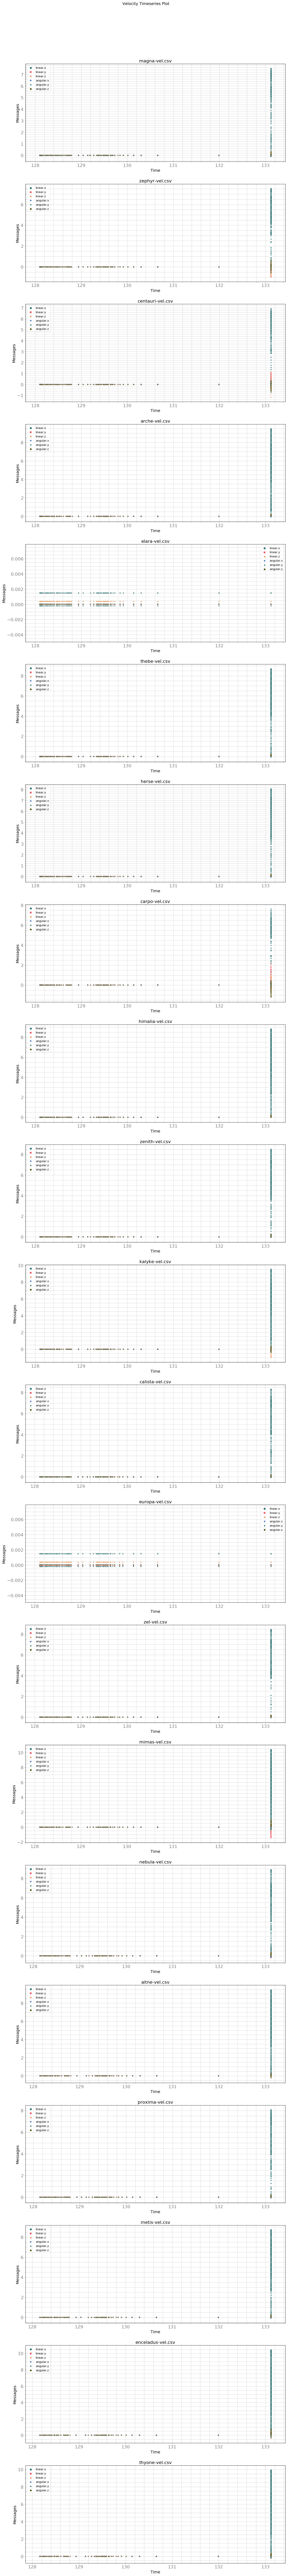

In [7]:
b.plot_vel()